In [36]:
import os
import pprint

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm as SVM
from sklearn.calibration import calibration_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score

# import __root__

plt.style.use('ggplot')
# %matplotlib inline


from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# PROJECT_ROOT = __root__.path()
#

class Data:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None

    def load_data(self, train_rows=None, test_rows=None, shfl=False, scl=False):
        data_folder = os.path.join("../", "data")
        X_train_file_path = os.path.join(data_folder, "Train/X_train.txt")
        y_train_file_path = os.path.join(data_folder, "Train/y_train.txt")
        X_test_file_path = os.path.join(data_folder, "Test/X_test.txt")
        y_test_file_path = os.path.join(data_folder, "Test/y_test.txt")
        self.X_train = np.loadtxt(X_train_file_path, delimiter=' ')[0:train_rows, :]
        self.y_train = np.loadtxt(y_train_file_path, delimiter=' ')[0:train_rows, ]
        self.X_test = np.loadtxt(X_test_file_path, delimiter=' ')[0:test_rows, :]
        self.y_test = np.loadtxt(y_test_file_path, delimiter=' ')[0:test_rows, ]
        # self.y_train = np.loadtxt(y_test_file_path, delimiter=' ').reshape(-1, 1)
        # self.y_test = np.loadtxt(y_test_file_path, delimiter=' ').reshape(-1, 1)
        if scl:
            StandardScaler().fit_transform(self.X_train)
        if shfl:
            self.X_train, self.y_train = shuffle(self.X_train, self.y_train)


class Classifiers:
    def __init__(self, data):
        self.X_train = data.X_train
        self.y_train = data.y_train
        self.X_test = data.X_test
        self.y_test = data.y_test
        self.y_predict = {}  # {k - name_of_classifier, v - [predictions]}
        self.cls = {}  # {k - name_of_classifier, v - sklearn_classifier_object}
        self.scores = {}  # {k - name_of_classifier, { k - score_metric, v - score}}

    def add_classifier(self, classifier_name, classifier):
        self.cls[classifier_name] = classifier

    def fit(self):
        for classifier_name, classifier in self.cls.items():
#             cross_val_score(classifier, self.X_train, self.y_train, cv=5)
            classifier.fit(self.X_train, self.y_train)

    def predict(self):
        for classifier_name, classifier in self.cls.items():
            self.y_predict[classifier_name] = classifier.predict(self.X_test)

    def get_scores(self):
        for classifier_name, classifier in self.cls.items():
            self.__get_score(classifier_name, classifier)

    def __get_score(self, classifier_name, classifier):
        self.scores[classifier_name] = {
            "accuracy": accuracy_score(self.y_test, self.y_predict[classifier_name]),
            # "confusion_matrix": confusion_matrix(self.y_test, self.y_predict[classifier_name])
        }

    def predicted_scores(self):
        return self.scores
    
    def print_scores(self):
        pprint.pprint(self.scores)

In [55]:
data.X_train.shape

(7767, 561)

In [60]:
# Checking multiple PCA values
from sklearn.decomposition import PCA
pca_values = [5, 10, 25, 30, 40, 50, 100, 150, 200, 250, 300, 561]
# pca_values = [30]
data = Data()
# data.load_data(3000)
data.load_data(shfl=True)
print (data.X_train.shape)

scores = {}

for v in pca_values:
    pca = PCA(n_components=v)
    pca.fit_transform(data.X_train)
    pca.transform(data.X_test)
    # print(pca.explained_variance_ratio_)


    cls = Classifiers(data)
    dtc = DecisionTreeClassifier(max_features=0.8)
    gnb = GaussianNB()
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    svm = SVM.SVC(kernel="linear")
    rfc = RandomForestClassifier(n_estimators=10, max_features=0.8)
    cls.add_classifier("decision-trees", dtc)
    cls.add_classifier("random-forest", rfc)
    cls.add_classifier("gaussian-naive-bayes", gnb)
    cls.add_classifier("linear-discriminant-analysis", lda)
    cls.add_classifier("quadratic-discriminant-analysis", qda)
    cls.add_classifier("support-vector-machine", svm)
    cls.fit()
    cls.predict()
    cls.get_scores()
    for k, v in cls.predicted_scores().items():
        try:
            scores[k] += [v["accuracy"]]
        except KeyError:
            scores[k] = [v["accuracy"]]
#     scores.append(raw_scores.values())
#     cls.print_scores()

    

(7767, 561)


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
//anaconda/lib/python3.5/site-packages/sklearn/discr

In [68]:
saved_scores = scores

30 PCA
{'decision-trees': {'accuracy': 0.81372549019607843},
 'gaussian-naive-bayes': {'accuracy': 0.74731182795698925},
 'linear-discriminant-analysis': {'accuracy': 0.94876660341555974},
 'quadratic-discriminant-analysis': {'accuracy': 0.84819734345351039},
 'random-forest': {'accuracy': 0.88108791903858319},
 'support-vector-machine': {'accuracy': 0.95192915876027828}}

gaussian-naive-bayes [0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925, 0.74731182795698925]
random-forest [0.89089184060721061, 0.87950664136622392, 0.8855154965211891, 0.87887413029728023, 0.87919038583175202, 0.88425047438330173, 0.88456672991777352, 0.88393421884882983, 0.87160025300442756, 0.88298545224541425, 0.88709677419354838, 0.88393421884882983]
support-vector-machine [0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828, 0.95192915876027828]
decision-trees [0.80107526881720426, 0.83364958886780516, 0.81056293485135988, 0.84408602150537637, 0.79949399114484498, 0.84914611005692597, 0.83238456672991779, 0.82479443390259333, 

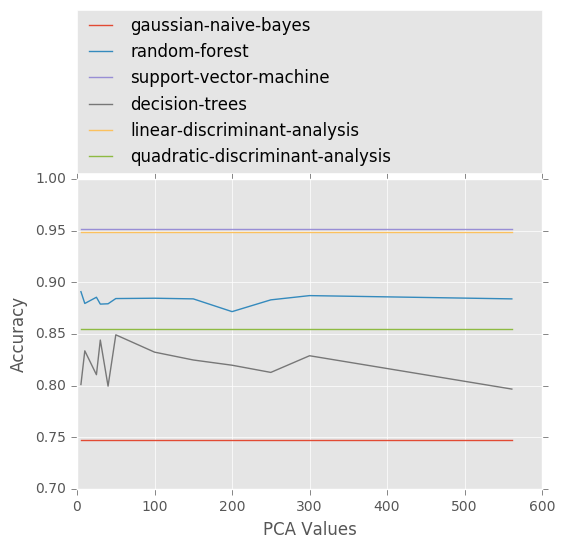

In [69]:
colors = {}

for k, v in saved_scores.items():
    print(k, v)
    plt.plot(pca_values, v, label=k)
plt.xlabel("PCA Values")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

data = Data()
data.load_data(shfl=True)
cls = Classifiers(data)
dtc = DecisionTreeClassifier(max_features=0.8)
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm = SVM.SVC(kernel="linear")
rfc = RandomForestClassifier(n_estimators=10, max_features=0.8)
gbt = GradientBoostingClassifier(max_depth=30)
# cls.add_classifier("decision-trees", dtc)
cls.add_classifier("random-forest", rfc)
# cls.add_classifier("gaussian-naive-bayes", gnb)
cls.add_classifier("linear-discriminant-analysis", lda)
# cls.add_classifier("quadratic-discriminant-analysis", qda)
cls.add_classifier("support-vector-machine", svm)
cls.add_classifier("gradient-boosted-trees", gbt)
cls.fit()
cls.predict()
cls.get_scores()
cls.print_scores()

//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'gradient-boosted-trees': {'accuracy': 0.85989879822896897},
 'linear-discriminant-analysis': {'accuracy': 0.94876660341555974},
 'random-forest': {'accuracy': 0.88330170777988615},
 'support-vector-machine': {'accuracy': 0.95192915876027828}}
